# Comparing SN Ia Distances

In [1]:
frfiles = ['YSE/yse_gr_gi_gz_PLASTICC_MODEL90_SNIa-SALT2/FITOPT000.FITRES',
          'YSE/yse_gr_gi_gz_10per_PLASTICC_MODEL90_SNIa-SALT2/FITOPT000.FITRES',
          'YSE/yse_gr_gi_gz_30per_PLASTICC_MODEL90_SNIa-SALT2/FITOPT000.FITRES',
          'YSE/yse_gi_rz_PLASTICC_MODEL90_SNIa-SALT2/FITOPT000.FITRES',
          'YSE/yse_gr_gi_gz_30s_PLASTICC_MODEL90_SNIa-SALT2/FITOPT000.FITRES',
          'YSE/yse_gri_grz_PLASTICC_MODEL90_SNIa-SALT2/FITOPT000.FITRES']
surveynames = ['gr, gi, gz',
              'gr, gi, gz, 10% 1-day',
              'gr, gi, gz, 30% 1-day',
              'gi, rz, 10% 1-day',
              'gr, gi, gz, 30s, 10% 1-day',
              'gri, grz, 10% 1-day']

### Getting some basic numbers

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import getmu
from txtobj import txtobj

In [12]:
for frfile,surveyname in zip(frfiles,surveynames):
    fr = txtobj(frfile,fitresheader=True)
    fr = getmu.getmu(fr,sigint=0.0)
    fr = getmu.mkcuts(fr)
    iErr = fr.muerr < 0.15
    for k in fr.__dict__.keys():
        fr.__dict__[k] = fr.__dict__[k][iErr]
    print('survey: %s, N_SN = %i, z_med = %.3f, sigma_x1 = %s, sigma_c = %.3f'%(
        surveyname,len(fr.CID),np.median(fr.zCMB),np.median(fr.x1ERR),np.median(fr.cERR)))

survey: gr, gi, gz, N_SN = 352, z_med = 0.097, sigma_x1 = 0.384185, sigma_c = 0.044
survey: gr, gi, gz, 10% 1-day, N_SN = 333, z_med = 0.093, sigma_x1 = 0.39123, sigma_c = 0.044
survey: gr, gi, gz, 30% 1-day, N_SN = 376, z_med = 0.104, sigma_x1 = 0.3849, sigma_c = 0.044
survey: gi, rz, 10% 1-day, N_SN = 160, z_med = 0.098, sigma_x1 = 0.44162999999999997, sigma_c = 0.051
survey: gr, gi, gz, 30s, 10% 1-day, N_SN = 390, z_med = 0.122, sigma_x1 = 0.358565, sigma_c = 0.041
survey: gri, grz, 10% 1-day, N_SN = 295, z_med = 0.107, sigma_x1 = 0.38422, sigma_c = 0.043


### A couple histograms

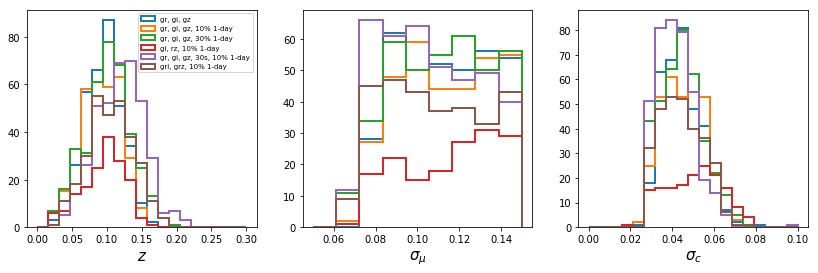

In [11]:
plt.rcParams['figure.figsize'] = (14,4)
ax1,ax2,ax3 = plt.subplot(131),plt.subplot(132),plt.subplot(133)
for frfile,surveyname in zip(frfiles,surveynames):
    fr = txtobj(frfile,fitresheader=True)
    fr = getmu.getmu(fr,sigint=0.0)
    fr = getmu.mkcuts(fr)
    iErr = fr.muerr < 0.15
    for k in fr.__dict__.keys():
        fr.__dict__[k] = fr.__dict__[k][iErr]
    zbins = np.linspace(0,0.3,20)
    errbins = np.linspace(0.05,0.15,10)
    cerrbins = np.linspace(0.0,0.1,20)
    ax1.hist(fr.zCMB,bins=zbins,histtype='step',lw=2,label=surveyname)
    ax2.hist(fr.muerr,bins=errbins,histtype='step',lw=2)
    ax3.hist(fr.cERR,bins=cerrbins,histtype='step',lw=2)
    ax1.set_xlabel('$z$',fontsize=15)
    ax2.set_xlabel('$\sigma_{\mu}$',fontsize=15)
    ax3.set_xlabel('$\sigma_{c}$',fontsize=15)
    ax1.legend(prop={'size':7})

### Light curves with SALT2 Fits

In [5]:
import sncosmo
import register
register.from_kcor('kcor_PS1_ZTF_none.fits')

RuntimeError: kcor file format is non-standard for kcor file kcor_PS1_ZTF_none.fits

In [ ]:
def plotLCs(idx):
    j = 0
    for i in idx:
        sn = X.loc[X.index[i]]
        ax1 = plt.subplot(gs1[j % 24]); ax2 = plt.subplot(gs1[(j+1) % 24])
        ax3 = plt.subplot(gs1[(j+2) % 24]); ax4 = plt.subplot(gs1[(j+3) % 24])
        if j == 0:
            for f,ax in zip('griz',[ax1,ax2,ax3,ax4]):
                ax.set_title('$%s$'%f)
        for f,ax,label in zip('XY',[ax1,ax2],['ZTF','ZTF-r']):
            ax.errorbar(sn['mjd_%s'%f]-sn['SIM_PEAKMJD'],sn['fluxcal_%s'%f],
                        yerr=sn['fluxcalerr_%s'%f],fmt='.',label=label)
        for f,ax in zip('griz',[ax1,ax2,ax3,ax4]):
            ax.errorbar(sn['mjd_%s'%f]-sn['SIM_PEAKMJD'],sn['fluxcal_%s'%f],
                        yerr=sn['fluxcalerr_%s'%f],fmt='o',label='PS1',color='k')
            ax.set_title('$%s$'%f)
            ax.set_xlim([-40,80])
            ax.set_ylim([-1*0.1*np.max(np.concatenate((sn['fluxcal_g'][(sn['mjd_g']-sn['SIM_PEAKMJD'] > -40) & (sn['mjd_g']-sn['SIM_PEAKMJD'] < 80)],
                        sn['fluxcal_r'][(sn['mjd_r']-sn['SIM_PEAKMJD'] > -40) & (sn['mjd_r']-sn['SIM_PEAKMJD'] < 80)],
                        sn['fluxcal_i'][(sn['mjd_i']-sn['SIM_PEAKMJD'] > -40) & (sn['mjd_i']-sn['SIM_PEAKMJD'] < 80)],
                        sn['fluxcal_z'][(sn['mjd_z']-sn['SIM_PEAKMJD'] > -40) & (sn['mjd_z']-sn['SIM_PEAKMJD'] < 80)]))),
                         1.5*np.max(np.concatenate((sn['fluxcal_g'][(sn['mjd_g']-sn['SIM_PEAKMJD'] > -40) & (sn['mjd_g']-sn['SIM_PEAKMJD'] < 80)],
                        sn['fluxcal_r'][(sn['mjd_r']-sn['SIM_PEAKMJD'] > -40) & (sn['mjd_r']-sn['SIM_PEAKMJD'] < 80)],
                        sn['fluxcal_i'][(sn['mjd_i']-sn['SIM_PEAKMJD'] > -40) & (sn['mjd_i']-sn['SIM_PEAKMJD'] < 80)],
                        sn['fluxcal_z'][(sn['mjd_z']-sn['SIM_PEAKMJD'] > -40) & (sn['mjd_z']-sn['SIM_PEAKMJD'] < 80)])))])
            ax.xaxis.set_ticks([-30,0,30,60])
            ax.set_xlabel('phase')

        if j == 0: ax1.legend()
    
        ax1.set_ylabel('%s\nz=%.2f\nFlux'%(
            sn['SIM_TYPE'],sn['z']),va='center',ha='center',labelpad=30)
        ax2.yaxis.set_ticklabels([]); ax3.yaxis.set_ticklabels([]); ax4.yaxis.set_ticklabels([])
    
        j += 4